In [1]:
from Resnet import ResNet18Embedder
import glob

In [2]:

# 使い方例
# CPUで実行する場合
embedder = ResNet18Embedder(device="cpu")
#embedder = ResNet18Embedder(device="cuda:0") # GPUで実行する場合
# 画像パスを指定して呼び出す


/home/setup/miniconda3/envs/vision/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/setup/miniconda3/envs/vision/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [69]:
import time
jpg_path_list="images/*.jpg"

vector_dict = {}
for png_path in glob.glob(jpg_path_list):
    start_time = time.time()
    vector = embedder(png_path)
    elapsed_time = time.time() - start_time
    vector_dict[png_path] = vector
    print(elapsed_time)

0.031484365463256836
0.031432390213012695
0.029654741287231445
0.02684760093688965
0.02385878562927246
0.023960351943969727
0.02230381965637207
0.021190166473388672
0.020305633544921875
0.02126288414001465
0.03594040870666504
0.020482540130615234
0.01951003074645996
0.019873857498168945
0.01979827880859375
0.01963639259338379
0.020072221755981445
0.019985198974609375
0.09697103500366211
0.019190073013305664
0.019284486770629883
0.01976609230041504
0.020595550537109375
0.018378019332885742
0.0405275821685791
0.026181459426879883
0.026659011840820312
0.02218937873840332
0.02364182472229004
0.021961212158203125
0.02341628074645996
0.0233614444732666
0.02282571792602539
0.0222623348236084
0.0224916934967041
0.023389101028442383
0.024827957153320312
0.02404952049255371
0.023673534393310547
0.02399897575378418
0.02360391616821289
0.023761987686157227
0.023538827896118164
0.02392435073852539
0.023639678955078125
0.02366018295288086
0.02376532554626465
0.023932933807373047
0.023760557174682617

/tmp/ipykernel_15678/2613344132.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  similarity_matrix[i, j] = cosine_similarity(vector_i.reshape(1, -1), vector_j.reshape(1, -1))
/tmp/ipykernel_15678/2613344132.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  similarity_matrix[i, j] = cosine_similarity(vector_i.reshape(1, -1), vector_j.reshape(1, -1))
/tmp/ipykernel_15678/2613344132.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  similarity_matrix[i, j] = 

<Axes: >

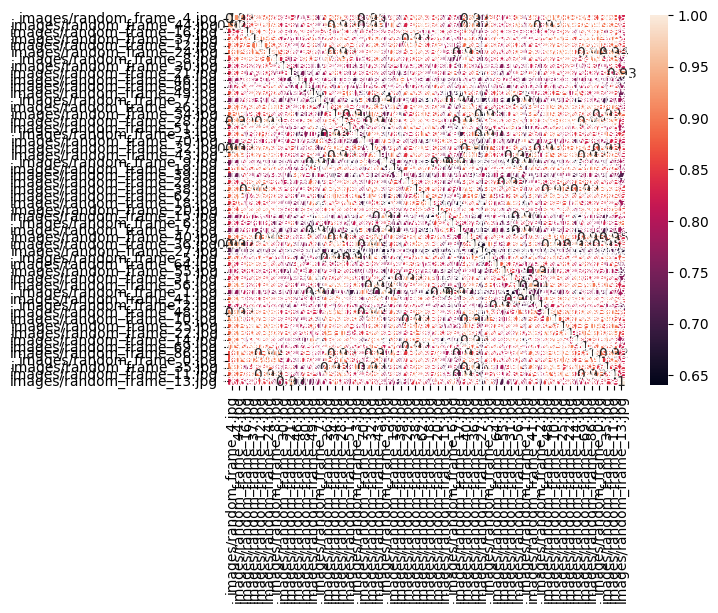

In [ ]:
#コサイン類似度を計算
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import seaborn as sns

# 類似度行列を計算
similarity_matrix = np.zeros((len(vector_dict), len(vector_dict)))
for i, (path_i, vector_i) in enumerate(vector_dict.items()):
    for j, (path_j, vector_j) in enumerate(vector_dict.items()):
        similarity_matrix[i, j] = cosine_similarity(vector_i.reshape(1, -1), vector_j.reshape(1, -1))

#plot

#sns.heatmap(similarity_matrix, annot=True, xticklabels=vector_dict.keys(), yticklabels=vector_dict.keys())

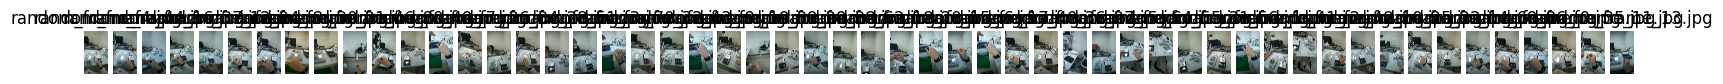

In [71]:
# 画像を表示
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

fig, ax = plt.subplots(1, len(vector_dict), figsize=(20, 5))
for i, (path, vector) in enumerate(vector_dict.items()):
    ax[i].imshow(mpimg.imread(path))
    ax[i].axis("off")
    ax[i].set_title(path.split("/")[-1])

In [72]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
def visualize_embeddings_2d(image_paths, embeddings_2d, figsize=(12, 8),
                             zoom=0.3,
                             ):
    """
    次元圧縮した2次元の埋め込みを、元画像をサムネイルとして
    matplotlib で可視化するサンプル関数

    Args:
        image_paths (list of str): 画像のパス一覧
        embeddings_2d (numpy.ndarray): shape (N, 2) の2次元埋め込み結果
        figsize (tuple): プロットのサイズ
        zoom (float): サムネイル画像の拡大率
    """
    fig, ax = plt.subplots(figsize=figsize,dpi=100)
    #ax.set_title("2D Visualization of Embeddings (UMAP)")

    for (x, y), img_path in zip(embeddings_2d, image_paths):
        # 画像を読み込んでサムネイルとして貼り付ける
        img = plt.imread(img_path)
        im = OffsetImage(img, zoom=zoom,alpha=1.0)
        ab = AnnotationBbox(im, (x, y), xycoords='data',
                             frameon=False,
                            
                             )
        ax.add_artist(ab)
        ax.scatter(x, y, color="none")

    # 軸ラベル非表示などのお好みの調整
    plt.xticks([])
    plt.yticks([])
    plt.show()


In [73]:
import os
import numpy as np
import umap
import matplotlib.pyplot as plt
image_folder = "images"
image_paths = sorted(glob.glob(os.path.join(image_folder, "*.jpg")))
print(f"画像枚数: {len(image_paths)}")

# -------------------
# 2. 埋め込みベクトルの取得
# -------------------
device = "cpu"
embedder = ResNet18Embedder(device=device)

embeddings = []
for path in image_paths:
    vec = embedder(path)  # shape: [512]
    embeddings.append(vec.cpu().numpy())

embeddings = np.vstack(embeddings)  # shape: (N, 512)

# -------------------
# 3. UMAPによる2次元化
# -------------------
reducer = umap.UMAP(n_components=2, random_state=42)
embeddings_2d = reducer.fit_transform(embeddings)  # shape: (N, 2)

# -------------------
# 4. 可視化
# -------------------


画像枚数: 54


/home/setup/miniconda3/envs/vision/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/setup/miniconda3/envs/vision/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/home/setup/miniconda3/envs/vision/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/setup/miniconda3/envs/vision/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 

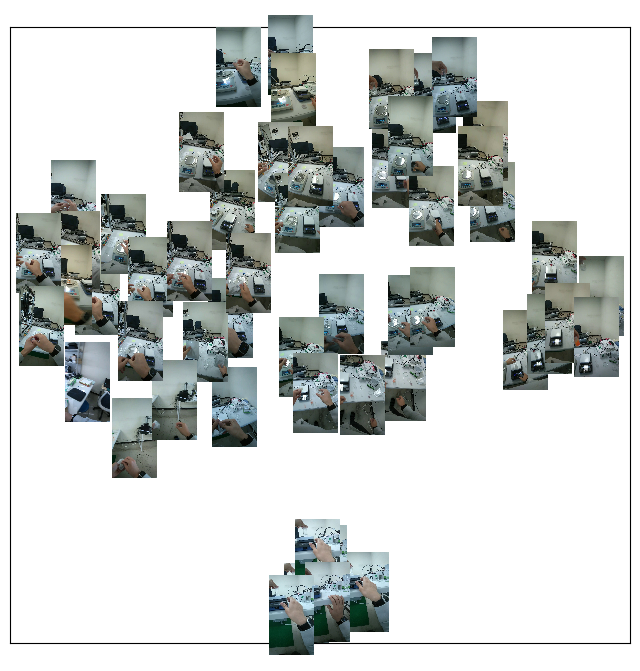

In [75]:
visualize_embeddings_2d(image_paths, embeddings_2d, 
                        figsize=(8, 8), 
                        zoom=0.03
                        )